In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelcriste/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelcriste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
gaybizDf = pd.read_pickle('/Users/michaelcriste/Documents/GitHub/informal-queer-spaces/data/newgaybiz_clean.pandas')
gaybizDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       771 non-null    object 
 1   gay_text          751 non-null    object 
 2   gay_text_len      751 non-null    float64
 3   gay_counts        751 non-null    object 
 4   gay_unique_count  751 non-null    float64
 5   known             771 non-null    bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 31.0+ KB


In [4]:
gaybizDf.head()

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known
0,wPi7p5fZyGTOjDU28IlTqA,"[gay, gay, lgbtq, gay, gay, gay, gay, gay, gay...",218.0,"{'gay': 178, 'lgbtq': 5, 'twinks': 1, 'lesbian...",12.0,True
1,FhwTEGqdir75uyXZqWqxlw,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",160.0,"{'gay': 153, 'gays': 5, 'homophobic': 1, 'homo...",4.0,False
2,ZH41CKIlAZrrQD-DMV2TWA,"[drag, drag, drag, drag, drag, drag, drag, dra...",156.0,"{'drag': 130, 'queens': 10, 'gay': 12, 'homose...",7.0,True
3,4FHXsFTyvvxc-pISdYkoeQ,"[lesbians, lesbian, lesbians, gay, lesbians, l...",105.0,"{'lesbians': 16, 'lesbian': 40, 'gay': 31, 'qu...",9.0,False
4,IORvbG2rAIVJ-1d148cCmg,"[drag, gay, gay, queer, gay, gay, gay, gay, ga...",88.0,"{'drag': 10, 'gay': 54, 'queer': 9, 'lesbian':...",9.0,True


In [5]:
phillybizDf = pd.read_pickle('/Users/michaelcriste/Documents/GitHub/informal-queer-spaces/data/bizPhil.pandas')
phillybizDf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 44840 entries, 3 to 150339
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   business_id   44840 non-null  object  
 1   name          44840 non-null  object  
 2   address       44840 non-null  object  
 3   city          44840 non-null  object  
 4   state         44840 non-null  object  
 5   postal_code   44840 non-null  object  
 6   latitude      44840 non-null  float64 
 7   longitude     44840 non-null  float64 
 8   stars         44840 non-null  float64 
 9   review_count  44840 non-null  int64   
 10  is_open       44840 non-null  int64   
 11  attributes    40920 non-null  object  
 12  categories    44802 non-null  object  
 13  hours         37236 non-null  object  
 14  geometry      44840 non-null  geometry
dtypes: float64(3), geometry(1), int64(2), object(9)
memory usage: 5.5+ MB


In [6]:
phillybizDf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",POINT (-75.15556 39.95551)
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",POINT (-75.47166 40.33818)
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",POINT (-75.14323 39.95395)
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",POINT (-75.16257 39.94322)
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ...",POINT (-74.98750 40.27349)


In [7]:
joinedDf = pd.merge(gaybizDf, phillybizDf, how='inner', on='business_id')
joinedDf.head()

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
0,wPi7p5fZyGTOjDU28IlTqA,"[gay, gay, lgbtq, gay, gay, gay, gay, gay, gay...",218.0,"{'gay': 178, 'lgbtq': 5, 'twinks': 1, 'lesbian...",12.0,True,Woody's,202 S 13th St,Philadelphia,PA,19107,39.949064,-75.162410,3.0,325,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Bars, American (Traditional), Gay...","{'Monday': '19:0-2:0', 'Tuesday': '19:0-2:0', ...",POINT (-75.16241 39.94906)
1,FhwTEGqdir75uyXZqWqxlw,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",160.0,"{'gay': 153, 'gays': 5, 'homophobic': 1, 'homo...",4.0,False,Big Gay Ice Cream,1351 South St,Philadelphia,PA,19147,39.943738,-75.165094,3.5,404,0,"{'RestaurantsPriceRange2': '1', 'GoodForMeal':...","Ice Cream & Frozen Yogurt, Party & Event Plann...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",POINT (-75.16509 39.94374)
2,ZH41CKIlAZrrQD-DMV2TWA,"[drag, drag, drag, drag, drag, drag, drag, dra...",156.0,"{'drag': 130, 'queens': 10, 'gay': 12, 'homose...",7.0,True,Bob & Barbara's,1509 South St,Philadelphia,PA,19146,39.944050,-75.167550,4.0,295,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Lounges, Bars, Nightlife, Dive Bars, Adult Ent...","{'Wednesday': '16:0-2:0', 'Thursday': '16:0-2:...",POINT (-75.16755 39.94405)
3,4FHXsFTyvvxc-pISdYkoeQ,"[lesbians, lesbian, lesbians, gay, lesbians, l...",105.0,"{'lesbians': 16, 'lesbian': 40, 'gay': 31, 'qu...",9.0,False,Sisters Restaurant & Nightclub,1320 Chancellor St,Philadelphia,PA,19107,39.948499,-75.163109,3.0,51,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Dance Clubs, Gay Bars, Nigh...",None,POINT (-75.16311 39.94850)
4,IORvbG2rAIVJ-1d148cCmg,"[drag, gay, gay, queer, gay, gay, gay, gay, ga...",88.0,"{'drag': 10, 'gay': 54, 'queer': 9, 'lesbian':...",9.0,True,Voyeur Nightclub,1221 Saint James St,Philadelphia,PA,19107,39.948345,-75.161863,3.0,163,1,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Nightlife, Dance Clubs, Gay Bars, Bars","{'Tuesday': '23:45-3:0', 'Wednesday': '23:0-3:...",POINT (-75.16186 39.94834)


In [8]:
joinedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 764
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       765 non-null    object  
 1   gay_text          751 non-null    object  
 2   gay_text_len      751 non-null    float64 
 3   gay_counts        751 non-null    object  
 4   gay_unique_count  751 non-null    float64 
 5   known             765 non-null    bool    
 6   name              765 non-null    object  
 7   address           765 non-null    object  
 8   city              765 non-null    object  
 9   state             765 non-null    object  
 10  postal_code       765 non-null    object  
 11  latitude          765 non-null    float64 
 12  longitude         765 non-null    float64 
 13  stars             765 non-null    float64 
 14  review_count      765 non-null    int64   
 15  is_open           765 non-null    int64   
 16  attributes        726 non-

In [9]:
joinedDf.tail(100)

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
665,sHpqOIuJ1YKKYVQdADYKOw,"[drag, drag]",2.0,{'drag': 2},1.0,False,Ron's Moving,2344 US 206,Southampton,NJ,08088,39.969241,-74.734724,3.0,14,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Junk Removal & Hauling, Local Services, Movers...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",POINT (-74.73472 39.96924)
666,2i6DI1RBQIaD5DxHYHot7g,"[trans, trans]",2.0,{'trans': 2},1.0,False,Pennsylvania Convention Center,1101 Arch St,Philadelphia,PA,19107,39.954904,-75.159982,3.5,130,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Event Planning & Services","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",POINT (-75.15998 39.95490)
667,8BfXofH792_mx-d-mqHD6w,"[homophobic, gays]",2.0,"{'homophobic': 1, 'gays': 1}",2.0,False,Doc's Union Pub,1843 S 2nd St,Philadelphia,PA,19148,39.924632,-75.149958,2.0,11,0,"{'RestaurantsReservations': 'False', 'Restaura...","Bars, Restaurants, Pubs, Nightlife","{'Monday': '18:0-2:0', 'Tuesday': '18:0-2:0', ...",POINT (-75.14996 39.92463)
668,8Ck78FmeRO7W9iy1-5eCeg,"[gay, drag]",2.0,"{'gay': 1, 'drag': 1}",2.0,False,Logan Inn,10 W Ferry St,New Hope,PA,18938,40.363467,-74.951450,3.0,153,1,"{'RestaurantsDelivery': 'False', 'WiFi': 'u'fr...","Caterers, Hotels & Travel, Mediterranean, Hote...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",POINT (-74.95145 40.36347)
669,wopwoiKIllIzcggK7HkTmw,"[drag, queens]",2.0,"{'drag': 1, 'queens': 1}",2.0,False,The Gold Standard Cafe,4800 Baltimore Ave,Philadelphia,PA,19143,39.948184,-75.219669,3.0,312,1,"{'RestaurantsPriceRange2': '2', 'WiFi': 'u'fre...","American (Traditional), American (New), Restau...","{'Monday': '7:0-19:0', 'Tuesday': '9:30-15:0',...",POINT (-75.21967 39.94818)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,JtxubrvRdst9xsmCZV6keg,NaN,NaN,NaN,NaN,True,"Atlantis, The Lost Bar",2442 Frankford Ave,Philadelphia,PA,19125,39.982547,-75.126797,4.0,73,1,"{'Alcohol': 'u'full_bar'', 'BusinessParking': ...","Bars, Pubs, Nightlife, Dive Bars","{'Monday': '12:30-2:0', 'Tuesday': '12:30-2:0'...",POINT (-75.12680 39.98255)
761,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
762,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
763,9UD0Smup80sh-c7zc9ySdA,NaN,NaN,NaN,NaN,True,Danny's Midnight Confessions,133 S 13th St,Philadelphia,PA,19107,39.949469,-75.161737,4.0,34,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Adult, Books, Mags, Music & Video, Shopping, B...","{'Monday': '5:0-2:0', 'Tuesday': '5:0-2:0', 'W...",POINT (-75.16174 39.94947)


In [10]:
joinedDf.replace(r'^\s*$', np.nan, regex=True)

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
0,wPi7p5fZyGTOjDU28IlTqA,"[gay, gay, lgbtq, gay, gay, gay, gay, gay, gay...",218.0,"{'gay': 178, 'lgbtq': 5, 'twinks': 1, 'lesbian...",12.0,True,Woody's,202 S 13th St,Philadelphia,PA,19107,39.949064,-75.162410,3.0,325,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Bars, American (Traditional), Gay...","{'Monday': '19:0-2:0', 'Tuesday': '19:0-2:0', ...",POINT (-75.16241 39.94906)
1,FhwTEGqdir75uyXZqWqxlw,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",160.0,"{'gay': 153, 'gays': 5, 'homophobic': 1, 'homo...",4.0,False,Big Gay Ice Cream,1351 South St,Philadelphia,PA,19147,39.943738,-75.165094,3.5,404,0,"{'RestaurantsPriceRange2': '1', 'GoodForMeal':...","Ice Cream & Frozen Yogurt, Party & Event Plann...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",POINT (-75.16509 39.94374)
2,ZH41CKIlAZrrQD-DMV2TWA,"[drag, drag, drag, drag, drag, drag, drag, dra...",156.0,"{'drag': 130, 'queens': 10, 'gay': 12, 'homose...",7.0,True,Bob & Barbara's,1509 South St,Philadelphia,PA,19146,39.944050,-75.167550,4.0,295,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Lounges, Bars, Nightlife, Dive Bars, Adult Ent...","{'Wednesday': '16:0-2:0', 'Thursday': '16:0-2:...",POINT (-75.16755 39.94405)
3,4FHXsFTyvvxc-pISdYkoeQ,"[lesbians, lesbian, lesbians, gay, lesbians, l...",105.0,"{'lesbians': 16, 'lesbian': 40, 'gay': 31, 'qu...",9.0,False,Sisters Restaurant & Nightclub,1320 Chancellor St,Philadelphia,PA,19107,39.948499,-75.163109,3.0,51,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Dance Clubs, Gay Bars, Nigh...",None,POINT (-75.16311 39.94850)
4,IORvbG2rAIVJ-1d148cCmg,"[drag, gay, gay, queer, gay, gay, gay, gay, ga...",88.0,"{'drag': 10, 'gay': 54, 'queer': 9, 'lesbian':...",9.0,True,Voyeur Nightclub,1221 Saint James St,Philadelphia,PA,19107,39.948345,-75.161863,3.0,163,1,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Nightlife, Dance Clubs, Gay Bars, Bars","{'Tuesday': '23:45-3:0', 'Wednesday': '23:0-3:...",POINT (-75.16186 39.94834)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,JtxubrvRdst9xsmCZV6keg,NaN,NaN,NaN,NaN,True,"Atlantis, The Lost Bar",2442 Frankford Ave,Philadelphia,PA,19125,39.982547,-75.126797,4.0,73,1,"{'Alcohol': 'u'full_bar'', 'BusinessParking': ...","Bars, Pubs, Nightlife, Dive Bars","{'Monday': '12:30-2:0', 'Tuesday': '12:30-2:0'...",POINT (-75.12680 39.98255)
761,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
762,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
763,9UD0Smup80sh-c7zc9ySdA,NaN,NaN,NaN,NaN,True,Danny's Midnight Confessions,133 S 13th St,Philadelphia,PA,19107,39.949469,-75.161737,4.0,34,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Adult, Books, Mags, Music & Video, Shopping, B...","{'Monday': '5:0-2:0', 'Tuesday': '5:0-2:0', 'W...",POINT (-75.16174 39.94947)


In [11]:
# joinedDf['known'] = joinedDf['known'].fillna(True)
# joinedDf
# This is emptied the NaN values 

# joinedDf['known'] = joinedDf['known'].map({'NaN': True, 'no': False}) 
# # This just turned everything into NaN...the opposite of helpful

joinedDf.known = joinedDf.known.fillna(True)

In [12]:
joinedDf.known

0       True
1      False
2       True
3      False
4       True
       ...  
760     True
761     True
762     True
763     True
764     True
Name: known, Length: 765, dtype: bool

In [13]:
joinedDf

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
0,wPi7p5fZyGTOjDU28IlTqA,"[gay, gay, lgbtq, gay, gay, gay, gay, gay, gay...",218.0,"{'gay': 178, 'lgbtq': 5, 'twinks': 1, 'lesbian...",12.0,True,Woody's,202 S 13th St,Philadelphia,PA,19107,39.949064,-75.162410,3.0,325,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Bars, American (Traditional), Gay...","{'Monday': '19:0-2:0', 'Tuesday': '19:0-2:0', ...",POINT (-75.16241 39.94906)
1,FhwTEGqdir75uyXZqWqxlw,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",160.0,"{'gay': 153, 'gays': 5, 'homophobic': 1, 'homo...",4.0,False,Big Gay Ice Cream,1351 South St,Philadelphia,PA,19147,39.943738,-75.165094,3.5,404,0,"{'RestaurantsPriceRange2': '1', 'GoodForMeal':...","Ice Cream & Frozen Yogurt, Party & Event Plann...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",POINT (-75.16509 39.94374)
2,ZH41CKIlAZrrQD-DMV2TWA,"[drag, drag, drag, drag, drag, drag, drag, dra...",156.0,"{'drag': 130, 'queens': 10, 'gay': 12, 'homose...",7.0,True,Bob & Barbara's,1509 South St,Philadelphia,PA,19146,39.944050,-75.167550,4.0,295,1,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Lounges, Bars, Nightlife, Dive Bars, Adult Ent...","{'Wednesday': '16:0-2:0', 'Thursday': '16:0-2:...",POINT (-75.16755 39.94405)
3,4FHXsFTyvvxc-pISdYkoeQ,"[lesbians, lesbian, lesbians, gay, lesbians, l...",105.0,"{'lesbians': 16, 'lesbian': 40, 'gay': 31, 'qu...",9.0,False,Sisters Restaurant & Nightclub,1320 Chancellor St,Philadelphia,PA,19107,39.948499,-75.163109,3.0,51,0,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Dance Clubs, Gay Bars, Nigh...",None,POINT (-75.16311 39.94850)
4,IORvbG2rAIVJ-1d148cCmg,"[drag, gay, gay, queer, gay, gay, gay, gay, ga...",88.0,"{'drag': 10, 'gay': 54, 'queer': 9, 'lesbian':...",9.0,True,Voyeur Nightclub,1221 Saint James St,Philadelphia,PA,19107,39.948345,-75.161863,3.0,163,1,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Nightlife, Dance Clubs, Gay Bars, Bars","{'Tuesday': '23:45-3:0', 'Wednesday': '23:0-3:...",POINT (-75.16186 39.94834)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,JtxubrvRdst9xsmCZV6keg,NaN,NaN,NaN,NaN,True,"Atlantis, The Lost Bar",2442 Frankford Ave,Philadelphia,PA,19125,39.982547,-75.126797,4.0,73,1,"{'Alcohol': 'u'full_bar'', 'BusinessParking': ...","Bars, Pubs, Nightlife, Dive Bars","{'Monday': '12:30-2:0', 'Tuesday': '12:30-2:0'...",POINT (-75.12680 39.98255)
761,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
762,Qc974_Ezjpqg2wW5uoEUxA,NaN,NaN,NaN,NaN,True,Level Up Bar & Lounge,1330 Walnut St,Philadelphia,PA,19107,39.949152,-75.163395,3.5,5,1,"{'RestaurantsTableService': 'True', 'Restauran...","American (Traditional), Restaurants, Nightlife...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",POINT (-75.16339 39.94915)
763,9UD0Smup80sh-c7zc9ySdA,NaN,NaN,NaN,NaN,True,Danny's Midnight Confessions,133 S 13th St,Philadelphia,PA,19107,39.949469,-75.161737,4.0,34,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Adult, Books, Mags, Music & Video, Shopping, B...","{'Monday': '5:0-2:0', 'Tuesday': '5:0-2:0', 'W...",POINT (-75.16174 39.94947)


In [14]:
#this is it. Generate pickle of visible and invisible queer business
joinedDf.to_pickle('data/completegaybiz.pandas')

In [15]:
# after running reviewing the results, we discovered that Dairy Queen was being captured by the bag of words
dairyqueens = joinedDf[joinedDf.name=='Dairy Queen']
dairyqueens.info()
# While not outrageous, there are 29 dairy queens included in the data set (more than out visible queer business list)
# Definitiely want to remove these 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 399 to 638
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   business_id       3 non-null      object  
 1   gay_text          3 non-null      object  
 2   gay_text_len      3 non-null      float64 
 3   gay_counts        3 non-null      object  
 4   gay_unique_count  3 non-null      float64 
 5   known             3 non-null      bool    
 6   name              3 non-null      object  
 7   address           3 non-null      object  
 8   city              3 non-null      object  
 9   state             3 non-null      object  
 10  postal_code       3 non-null      object  
 11  latitude          3 non-null      float64 
 12  longitude         3 non-null      float64 
 13  stars             3 non-null      float64 
 14  review_count      3 non-null      int64   
 15  is_open           3 non-null      int64   
 16  attributes        3 non-nu

Understanding the distribution of Business Types:
Many of the 'visible' queer spaces were bars. With the larger list, we would like to know what other types of spaces queer people are occupying. To find this we need analyze the categories of each indentified business

In [16]:
joinedDf.categories[0]

'Restaurants, Bars, American (Traditional), Gay Bars, Dance Clubs, Nightlife, Pubs'

In [17]:
list(joinedDf.categories.unique())

['Restaurants, Bars, American (Traditional), Gay Bars, Dance Clubs, Nightlife, Pubs',
 'Ice Cream & Frozen Yogurt, Party & Event Planning, Event Planning & Services, Food, Desserts',
 'Lounges, Bars, Nightlife, Dive Bars, Adult Entertainment',
 'Bars, Restaurants, Dance Clubs, Gay Bars, Nightlife',
 'Nightlife, Dance Clubs, Gay Bars, Bars',
 'Gay Bars, Nightlife, Dance Clubs, Restaurants, Bars, American (New)',
 'Nightlife, Bars, Lounges, Sports Bars, Gay Bars',
 'Dance Clubs, Gay Bars, Bars, Lounges, Nightlife',
 'American (New), Bars, Nightlife, Gay Bars, Restaurants',
 'American (New), Bars, Restaurants, Gay Bars, Nightlife',
 'Nightlife, Bars, Gay Bars',
 'Dance Clubs, Gay Bars, Bars, Nightlife',
 'Italian, Restaurants, Pizza',
 'Bookstores, Thrift Stores, Shopping, Books, Mags, Music & Video',
 'Gay Bars, Bars, Nightlife',
 'Gyms, Active Life, Trainers, Fitness & Instruction',
 'American (New), Nightlife, Restaurants, Arts & Entertainment, Comedy Clubs, Performing Arts, Bars',
 'J

In [18]:
joinedDf.drop(index=755, inplace=True)

In [19]:
joinedDf.reset_index(drop=True, inplace=True)

In [20]:
joinedDf.tail(20)

,business_id,gay_text,gay_text_len,gay_counts,gay_unique_count,known,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
744,5TZhLeZKfuSqrz3rnVIUxg,"[lgbtq, queens]",2.0,"{'lgbtq': 1, 'queens': 1}",2.0,False,Maison 208,208 S 13th St,Philadelphia,PA,19107,39.948462,-75.162526,3.5,184,0,"{'RestaurantsGoodForGroups': 'True', 'BestNigh...","Restaurants, Nightlife, French, American (New)...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ...",POINT (-75.16253 39.94846)
745,D64SJopgUAeXY_l7tX8klg,"[gay, gay]",2.0,{'gay': 2},1.0,False,Flying Carpet Cafe & Bar,1841 Poplar St,Philadelphia,PA,19130,39.971312,-75.167371,4.0,39,0,"{'RestaurantsDelivery': 'False', 'Ambience': '...","Middle Eastern, Tapas/Small Plates, Mediterran...","{'Monday': '16:0-2:0', 'Tuesday': '16:0-2:0', ...",POINT (-75.16737 39.97131)
746,4R2KR_-FybS7oegGrXjHVg,"[drag, drag]",2.0,{'drag': 2},1.0,False,Del Frisco's Double Eagle Steakhouse,1428-1432 Chestnut St,Philadelphia,PA,19102,39.950956,-75.165459,4.0,1129,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Fal...","Food, Restaurants, Seafood, Specialty Food, St...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",POINT (-75.16546 39.95096)
747,pxmBh8YZ6HLGQfNHvJoHzA,"[gay, queens]",2.0,"{'gay': 1, 'queens': 1}",2.0,False,Nomad Roman Pizza,1305 Locust St,Philadelphia,PA,19107,39.948018,-75.162688,4.0,286,0,"{'Alcohol': 'u'full_bar'', 'RestaurantsReserva...","Restaurants, Bars, Wine Bars, Italian, Pizza, ...","{'Monday': '16:30-22:0', 'Tuesday': '16:30-22:...",POINT (-75.16269 39.94802)
748,vP6BGF8IqbXlLQiDP5n6dA,"[queens, queens]",2.0,{'queens': 2},1.0,False,Yokohama Japanese Restaurant,300 S Lenola Rd,Maple Shade,NJ,08052,39.947721,-74.972034,4.5,386,1,"{'RestaurantsReservations': 'True', 'Restauran...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",POINT (-74.97203 39.94772)
749,yksAB6aQXfNRrZM0jTxyOA,"[drag, drag]",2.0,{'drag': 2},1.0,False,Yardley Inn Restaurant & Bar,82 E Afton Ave,Yardley,PA,19067,40.244897,-74.836648,4.0,275,1,"{'BusinessParking': '{'garage': False, 'street...","Nightlife, Seafood, Restaurants, Bars, America...","{'Monday': '11:30-20:0', 'Tuesday': '11:30-20:...",POINT (-74.83665 40.24490)
750,5HeO2Q_tKt8V9jgthPOnFw,"[trans, trans]",2.0,{'trans': 2},1.0,False,Dave's Best Limousine Service,,Philadelphia,PA,19135,40.020381,-75.055274,1.5,158,0,None,"Limos, Hotels & Travel, Airport Shuttles, Tran...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",POINT (-75.05527 40.02038)
751,oIr50siZDtDYCE_p5K8nYA,NaN,NaN,NaN,NaN,True,Winkel,1119 Locust St,Philadelphia,PA,19107,39.947791,-75.160339,4.5,246,1,"{'WheelchairAccessible': 'True', 'NoiseLevel':...","Breakfast & Brunch, Food, Sandwiches, Salad, C...","{'Monday': '0:0-0:0', 'Thursday': '8:0-15:0', ...",POINT (-75.16034 39.94779)
752,G9LZoNlCfRH941q87_JLIg,NaN,NaN,NaN,NaN,True,Mission Taqueria,"1516 Sansom St, Fl 2",Philadelphia,PA,19102,39.950222,-75.166553,4.0,617,1,"{'HasTV': 'True', 'RestaurantsTableService': '...","Tex-Mex, Restaurants, Food, Nightlife, Beer, W...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",POINT (-75.16655 39.95022)
753,l8VedGQFMLtTz2zRmpTlxA,NaN,NaN,NaN,NaN,True,Hardena/Waroeng Surabaya Restaurant,1754 S Hicks St,Philadelphia,PA,19145,39.928436,-75.171266,4.5,383,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","Indonesian, Singaporean, Restaurants, Asian Fu...","{'Wednesday': '12:0-20:0', 'Thursday': '12:0-2...",POINT (-75.17127 39.92844)


In [21]:
queercats = joinedDf.categories.dropna()

In [22]:
type(queercats)

pandas.core.series.Series

In [23]:
s = ""
for i in range(len(queercats)):
    s+=queercats[i]

In [24]:
s

"Restaurants, Bars, American (Traditional), Gay Bars, Dance Clubs, Nightlife, PubsIce Cream & Frozen Yogurt, Party & Event Planning, Event Planning & Services, Food, DessertsLounges, Bars, Nightlife, Dive Bars, Adult EntertainmentBars, Restaurants, Dance Clubs, Gay Bars, NightlifeNightlife, Dance Clubs, Gay Bars, BarsGay Bars, Nightlife, Dance Clubs, Restaurants, Bars, American (New)Nightlife, Bars, Lounges, Sports Bars, Gay BarsDance Clubs, Gay Bars, Bars, Lounges, NightlifeAmerican (New), Bars, Nightlife, Gay Bars, RestaurantsAmerican (New), Bars, Restaurants, Gay Bars, NightlifeNightlife, Bars, Gay BarsDance Clubs, Gay Bars, Bars, NightlifeItalian, Restaurants, PizzaBookstores, Thrift Stores, Shopping, Books, Mags, Music & VideoGay Bars, Bars, NightlifeGyms, Active Life, Trainers, Fitness & InstructionAmerican (New), Nightlife, Restaurants, Arts & Entertainment, Comedy Clubs, Performing Arts, BarsJazz & Blues, Restaurants, Arts & Entertainment, Piano Bars, Italian, Bars, NightlifeLo

In [25]:
def countWords(wordlist):
    counts = {} 
    
    for word in wordlist:
        lword = word.lower()
        if lword in counts:
            counts[lword] +=1
        else:
            counts[lword] = 1

    df = pd.DataFrame.from_dict(counts, orient='index', columns=['word_count'])
    df.sort_values('word_count', ascending=False, inplace=True)
    df.index.name = 'word'
    
    return df

wordlist = word_tokenize(re.sub(r"[^A-z\s]", "", s))

df = countWords(wordlist)
df.drop(index=stopwords.words('english'), errors='ignore', inplace=True)

# df.to_pickle('data/wordcounts_gay.pandas')

In [26]:
df

,word_count
word,
bars,292
restaurants,244
food,194
american,191
nightlife,150
...,...
trusts,1
probates,1
lawyers,1


array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

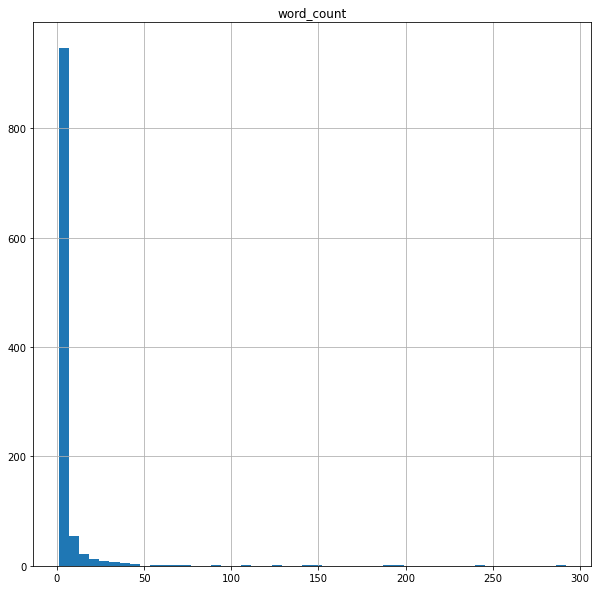

In [27]:
df.hist(column = 'word_count', figsize = (10,10), bins = 50)

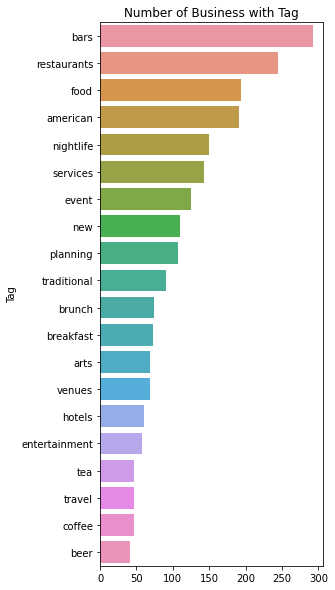

In [43]:
fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=df.word_count.values[:20], y=df.index[:20], ax=ax)
ax.set_title("Number of Business with Tag")
ax.set_ylabel("Tag")

# save figure
plt.savefig('categories_after.png')

In [40]:
plt.savefig('categories_after.png')

<Figure size 432x288 with 0 Axes>

In [30]:
#lets compare the tags from the originally visible queer spaces
gay_orig = joinedDf[joinedDf.known==True]

In [34]:
gay_orig.head()

0    Restaurants, Bars, American (Traditional), Gay...
2    Lounges, Bars, Nightlife, Dive Bars, Adult Ent...
4               Nightlife, Dance Clubs, Gay Bars, Bars
5    Gay Bars, Nightlife, Dance Clubs, Restaurants,...
6      Nightlife, Bars, Lounges, Sports Bars, Gay Bars
Name: categories, dtype: object

In [32]:
gay_orig = gay_orig.categories.dropna()

In [35]:
gay_orig.reset_index(drop=True, inplace=True)

In [36]:
s = ""
for i in range(len(gay_orig)):
    s+=gay_orig[i]

In [37]:
s

'Restaurants, Bars, American (Traditional), Gay Bars, Dance Clubs, Nightlife, PubsLounges, Bars, Nightlife, Dive Bars, Adult EntertainmentNightlife, Dance Clubs, Gay Bars, BarsGay Bars, Nightlife, Dance Clubs, Restaurants, Bars, American (New)Nightlife, Bars, Lounges, Sports Bars, Gay BarsDance Clubs, Gay Bars, Bars, Lounges, NightlifeAmerican (New), Bars, Nightlife, Gay Bars, RestaurantsNightlife, Bars, Gay BarsGay Bars, Karaoke, Music Venues, Bars, Nightlife, Arts & EntertainmentLocal Services, Community Service/Non-ProfitNightlife, Dance Clubs, Bars, Gay BarsMusic Venues, American (Traditional), Bars, Arts & Entertainment, Restaurants, NightlifeArts & Entertainment, Dance Clubs, Music Venues, Bars, NightlifeEvent Planning & Services, Bars, Nightlife, Cocktail Bars, BartendersLounges, Bars, Nightlife, Breakfast & Brunch, Mexican, RestaurantsBookstores, Shopping, Flea Markets, Newspapers & Magazines, Books, Mags, Music & Video, Thrift StoresLounges, Nightlife, Bars, Restaurants, Vegan

In [38]:
def countWords(wordlist):
    counts = {} 
    
    for word in wordlist:
        lword = word.lower()
        if lword in counts:
            counts[lword] +=1
        else:
            counts[lword] = 1

    df2 = pd.DataFrame.from_dict(counts, orient='index', columns=['word_count'])
    df2.sort_values('word_count', ascending=False, inplace=True)
    df2.index.name = 'word'
    
    return df2

wordlist = word_tokenize(re.sub(r"[^A-z\s]", "", s))

df2 = countWords(wordlist)
df2.drop(index=stopwords.words('english'), errors='ignore', inplace=True)

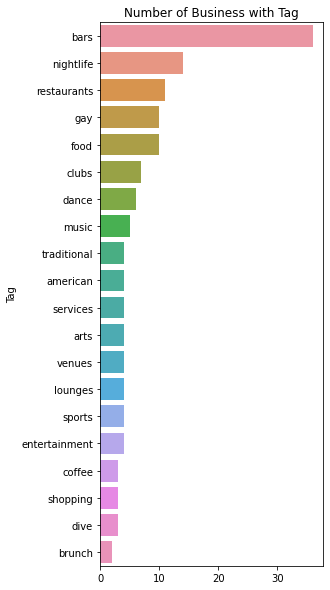

In [47]:
fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=df2.word_count.values[:20], y=df2.index[:20], ax=ax)
ax.set_title("Number of Business with Tag")
ax.set_ylabel("Tag")

# save figure
plt.savefig('categories_before.png', dpi=300, transparent=True)

In [41]:
plt.savefig('.../images/categories_before.png')

<Figure size 432x288 with 0 Axes>